In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'ANNClassify.ipynb',
 'classifyusingRF.ipynb',
 'ClassifyUsingSVM.ipynb',
 'Dataset_BUSI_with_GT']

In [3]:
# Set paths to your image directories
class_0_path = 'Dataset_BUSI_with_GT/normal/'
class_1_path = 'Dataset_BUSI_with_GT/benign/'
class_2_path = 'Dataset_BUSI_with_GT/malignant/'

In [4]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if 'mask' not in filename:
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load image in unchanged format
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize image to 64x64 pixels
                images.append(img.flatten())  # Flatten the image to a 1D array
                labels.append(label)
    return images, labels

# Load images from all three classes
images_0, labels_0 = load_images_from_folder(class_0_path, 0)
images_1, labels_1 = load_images_from_folder(class_1_path, 1)
images_2, labels_2 = load_images_from_folder(class_2_path, 2)

# Combine the data and labels from all classes
X = np.array(images_0 + images_1 + images_2)
y = np.array(labels_0 + labels_1 + labels_2)

In [5]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if 'mask' not in filename:
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load image in unchanged format
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize image to 64x64 pixels
                images.append(img.flatten())  # Flatten the image to a 1D array
                labels.append(label)
    return images, labels

# Load images from all three classes
images_0, labels_0 = load_images_from_folder(class_0_path, 0)
images_1, labels_1 = load_images_from_folder(class_1_path, 1)
images_2, labels_2 = load_images_from_folder(class_2_path, 2)

# Combine the data and labels from all classes
X = np.array(images_0 + images_1 + images_2)
y = np.array(labels_0 + labels_1 + labels_2)

In [56]:
print(X.shape)
print(y.shape)

(780, 4096)
(780,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
X_val, X_test2, y_val, y_test2 = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [59]:
model = Sequential()
model.add(Dense(64, input_shape = [4096,]))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [61]:
model_history = model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3434 - loss: 9.5542 - val_accuracy: 0.6273 - val_loss: 1.0963
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5402 - loss: 1.0947 - val_accuracy: 0.6273 - val_loss: 1.0914
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5247 - loss: 1.0912 - val_accuracy: 0.6273 - val_loss: 1.0859
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5429 - loss: 1.0857 - val_accuracy: 0.6273 - val_loss: 1.0804
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5486 - loss: 1.0821 - val_accuracy: 0.6273 - val_loss: 1.0746
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5321 - loss: 1.0781 - val_accuracy: 0.6273 - val_loss: 1.0695
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5299 - loss: 1.0756 - val_accuracy: 0.6273 - val_loss: 1.0643
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5076 - loss: 1.0733 - val_accuracy: 0.6273 - val_loss

In [62]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 795,011 (3.03 MB)

 Trainable params: 265,003 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 530,008 (2.02 MB)

In [63]:
y_prob = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [64]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred)

0.5512820512820513

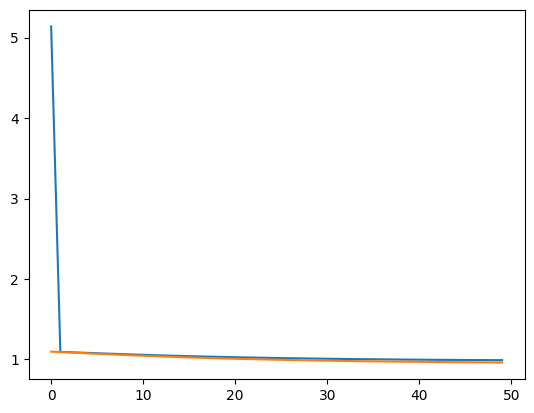

In [66]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])